In [1]:
from arcgis import GIS

In [47]:
gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "P@ssword123")

In [48]:
items = gis.content.search('title:CrimeAnalysisData owner:lscott_ANGP', outside_org=True)

In [49]:
from IPython.display import display

<Item title:"CrimeAnalysisData" type:Feature Layer Collection owner:lscott_ANGP>
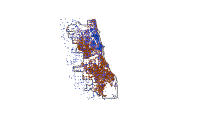

In [50]:
for item in items:
    display(item)

In [51]:
crime_item = items[0]

In [52]:
lyrs = crime_item.layers

In [53]:
for lyr in lyrs:
    print(lyr.properties.name)

Public High Schools
Liquor Vendors
Violent Crime 2014
Analysis Boundary


In [54]:
violent_crimes = lyrs[2]

In [59]:
violent_crimes

<FeatureLayer url:"https://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/CrimeAnalysisData/FeatureServer/2">

In [55]:
from arcgis.features.analyze_patterns import find_hot_spots

In [56]:
crime_hot_spots = find_hot_spots(violent_crimes, output_name='Crime Hot Spots')

In [62]:
crime_hot_spots

<Item title:"Crime Hot Spots" type:Feature Layer Collection owner:demo_deldev>

In [64]:
liquor_vendors = lyrs[1]

In [65]:
liquor_vendor_hot_spots = find_hot_spots(liquor_vendors,
                                         output_name='liquor Hot Spots')

In [66]:
liquor_vendor_hot_spots

<Item title:"liquor Hot Spots" type:Feature Layer Collection owner:demo_deldev>

In [67]:
from arcgis.features.enrich_data import enrich_layer

In [69]:
enriched_layer = enrich_layer(crime_hot_spots, 
                              analysis_variables=["households.ACSHHBPOV"], 
                              output_name='poverty_data')

In [70]:
enriched_layer

<Item title:"poverty_data" type:Feature Layer Collection owner:demo_deldev>

In [71]:
poverty_data_hot_spots = find_hot_spots(enriched_layer, analysis_field=
                                         output_name='poverty data Hot Spots')

{"messageCode": "AO_100011", "message": "Must provide an Analysis Field for polygon input."}
{"messageCode": "AO_100007", "message": "FindHotSpots failed."}
Failed to execute (FindHotSpots).
Failed.


Exception: Job failed.